<a href="https://colab.research.google.com/github/niteuwu/random-ml-learning/blob/main/pycaret_practice_diamond_iris_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In build diamond dataset exercise

In [2]:
!pip install pycaret mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 

In [ ]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
from pycaret.regression import *
s = setup(
    data,
    target = 'Price',
    transform_target = True,
    log_experiment = True,
    experiment_name = 'diamond'
)

,Description,Value
0,Session id,6928
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


2024/03/27 04:05:40 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,650.7621,1643390.7030,1270.1101,0.9847,0.0675,0.0502,0.2220
lightgbm,Light Gradient Boosting Machine,640.1865,1866661.5884,1332.6355,0.9827,0.0658,0.0484,0.6920
gbr,Gradient Boosting Regressor,767.2974,2369704.0754,1528.6798,0.9778,0.0774,0.0581,0.3990
rf,Random Forest Regressor,750.9603,2519910.0546,1557.1956,0.9766,0.0782,0.0578,1.3020
et,Extra Trees Regressor,773.1300,2628591.8655,1591.3711,0.9754,0.0805,0.0597,1.4770
dt,Decision Tree Regressor,953.7071,4115808.0842,1986.9343,0.9620,0.0999,0.0735,0.1590
ada,AdaBoost Regressor,2110.0730,19404651.8977,4367.7649,0.8216,0.1957,0.1585,0.5370
knn,K Neighbors Regressor,3099.4970,38151936.0132,6146.9627,0.6466,0.3674,0.2321,0.1660
omp,Orthogonal Matching Pursuit,3431.4435,94575888.8226,9472.4618,0.1189,0.2847,0.2223,0.1490
lasso,Lasso Regression,6717.1200,121198414.7255,10979.2454,-0.1267,0.7183,0.5686,0.1500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': 'cpu',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 6928,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

In [ ]:
import plotly.express as px

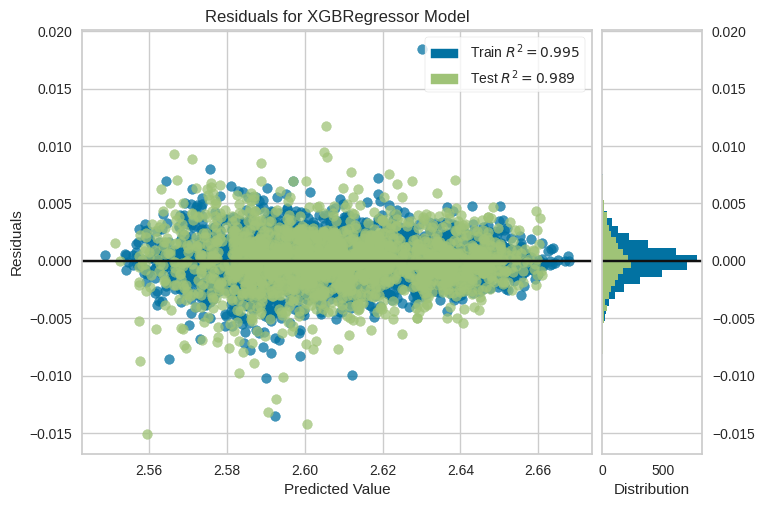

In [ ]:
plot_model(best, plot = 'residuals')

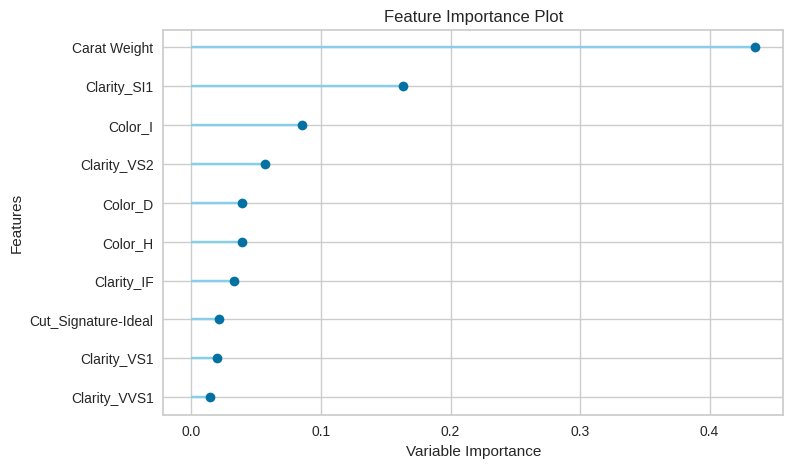

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
data_unseen = data.copy()
data_unseen.drop('Price', axis = 1, inplace = True)
pred = predict_model(best, data = data_unseen)

In [ ]:
pred

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5460.255859
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3545.721436
2,0.85,Ideal,H,SI1,EX,EX,GIA,3611.424316
3,0.91,Ideal,E,SI1,VG,VG,GIA,4683.468262
4,0.83,Ideal,G,SI1,EX,EX,GIA,3376.601807
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6181.225586
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5706.156738
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6173.876465
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11083.046875


In [ ]:
save_model('best', 'diamond_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                                                                          'mapping': AGSL    0
 GIA     1
 NaN    -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                             

# Iris Model from uciml/iris

In [ ]:
from google.colab import files
files.upload()
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d uciml/iris
!unzip iris.zip
!rm -f database.sqlite iris.zip

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 10.8MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [ ]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from pycaret.classification import *
s = setup(
    data = df,
    target = 'Species',
    experiment_name = 'iris',
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,8226
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9909,0.0000,0.9909,0.9932,0.9909,0.9864,0.9875,0.0380
lda,Linear Discriminant Analysis,0.9818,0.0000,0.9818,0.9818,0.9818,0.9725,0.9725,0.0290
lr,Logistic Regression,0.9609,0.0000,0.9609,0.9702,0.9605,0.9412,0.9462,0.0410
xgboost,Extreme Gradient Boosting,0.9609,0.0000,0.9609,0.9702,0.9605,0.9412,0.9462,0.2180
knn,K Neighbors Classifier,0.9518,0.0000,0.9518,0.9634,0.9514,0.9276,0.9337,0.0420
lightgbm,Light Gradient Boosting Machine,0.9518,0.0000,0.9518,0.9634,0.9514,0.9276,0.9337,0.0630
et,Extra Trees Classifier,0.9427,0.0000,0.9427,0.9520,0.9423,0.9137,0.9187,0.1800
dt,Decision Tree Classifier,0.9418,0.0000,0.9418,0.9559,0.9414,0.9127,0.9201,0.0300
rf,Random Forest Classifier,0.9418,0.0000,0.9418,0.9589,0.9405,0.9131,0.9224,0.2400
ada,Ada Boost Classifier,0.9409,0.0000,0.9409,0.9577,0.9392,0.9114,0.9210,0.1460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

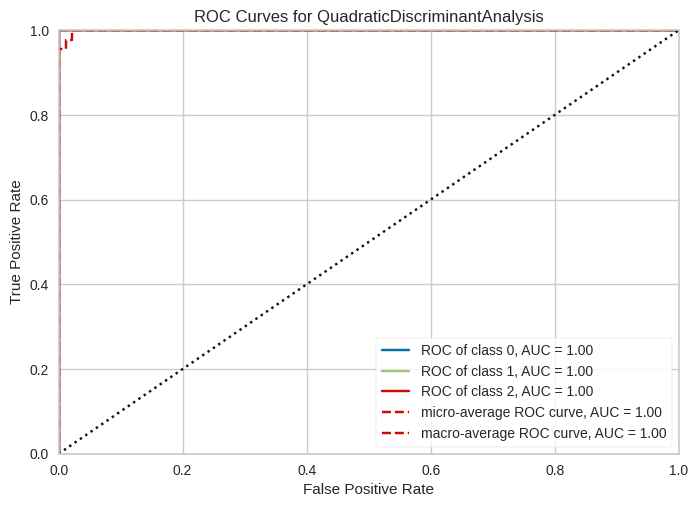

In [ ]:
plot_model(best)

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
best.get_params()

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [ ]:
save_model(best, 'iris_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SepalLengthCm', 'SepalWidthCm',
                                              'PetalLengthCm', 'PetalWidthCm'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_...
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                        

# Airline